In [109]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn  as sb

In [110]:
!ls

Exercise - Predict Future Sales Day 1.md
Untitled.ipynb
categories.csv
items.csv
sales_train.csv
sample_submission.csv
shops.csv
test.csv


In [112]:
# create df
cat_df = pd.read_csv('categories.csv')
items_df = pd.read_csv('items.csv')
shops_df = pd.read_csv('shops.csv')
sales_train_df = pd.read_csv('sales_train.csv')
test_df = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [6]:
cat_df.head()

,category_name,category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4


In [9]:
items_df.head()

,item_id,category_id,item_name
0,0,40,!! IN THE POWER OF HAPPINESS (PLAST) D
1,1,76,! ABBYY FineReader 12 Professional Edition Ful...
2,2,40,*** IN THE GLORY OF THE GLORY (UNV) D
3,3,40,*** BLUE WAVE (Univ) D
4,4,40,*** BOX (GLASS) D


In [10]:
shops_df.head()

,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 francs",0
1,"! Yakutsk TC ""Central"" fran",1
2,"Adygea TC ""Mega""",2
3,"Balashikha TC ""Oktyabr-Kinomir""",3
4,"Volga TC ""Volga Mall""",4


In [13]:
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [14]:
test_df.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [15]:
sales_train_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [21]:
sales_train_df.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [22]:
# look for neg values
neg_price = sales_train_df.item_price[sales_train_df.item_price < 0]
neg_price

484683   -1.0
Name: item_price, dtype: float64

In [25]:
# verify
sales_train_df.iloc[484683]

date              15.05.2013
date_block_num             4
shop_id                   32
item_id                 2973
item_price              -1.0
item_cnt_day             1.0
Name: 484683, dtype: object

In [26]:
# look for object datatypes where you expect nums
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [28]:
# look at min max values to see anything unusual 
sales_train_df.describe()
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [118]:
# create a column for month and year each
sales_train_df['month'] = sales_train_df.date.map(lambda x: x.split('.')[1] + x.split('.')[2] )
sales_train_df['year'] = sales_train_df.date.map(lambda x: x.split('.')[2])
sales_train_df.month.unique()

array(['012013', '022013', '032013', '042013', '052013', '062013',
       '072013', '082013', '092013', '102013', '112013', '122013',
       '012014', '022014', '032014', '042014', '052014', '062014',
       '072014', '082014', '092014', '102014', '112014', '122014',
       '012015', '022015', '032015', '042015', '052015', '062015',
       '072015', '082015', '092015', '102015'], dtype=object)

In [119]:
monthly_sales = sales_train_df.groupby('month').item_price.sum()
monthly_sales

month
012013    8.221187e+07
012014    8.572518e+07
012015    1.005736e+08
022013    7.558019e+07
022014    7.783305e+07
022015    7.255950e+07
032013    8.429831e+07
032014    8.355875e+07
032015    7.145842e+07
042013    6.151282e+07
042014    6.638839e+07
042015    5.897193e+07
052013    5.727413e+07
052014    6.753802e+07
052015    5.874271e+07
062013    6.334361e+07
062014    7.198654e+07
062015    5.573324e+07
072013    6.219681e+07
072014    6.671338e+07
072015    5.370635e+07
082013    6.543817e+07
082014    7.681620e+07
082015    5.425592e+07
092013    7.270157e+07
092014    7.735488e+07
092015    5.906161e+07
102013    7.391497e+07
102014    8.488921e+07
102015    6.553190e+07
112013    7.960888e+07
112014    1.053448e+08
122013    1.431799e+08
122014    1.794057e+08
Name: item_price, dtype: float64

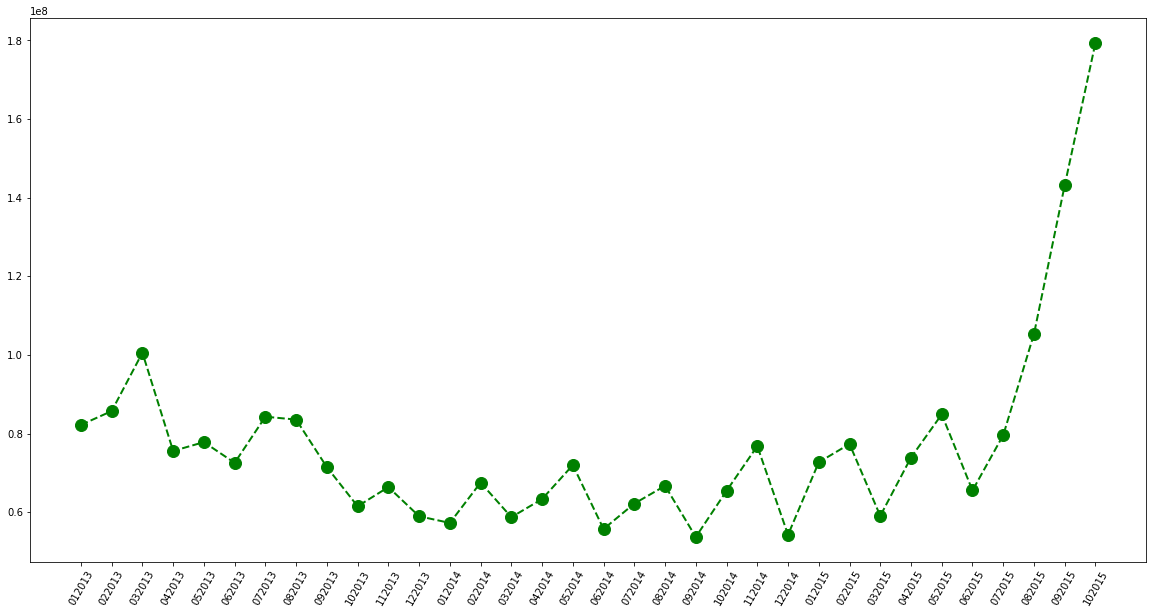

In [120]:
def get_month(m):
    m = m.tolist()
    res = []
    for i in m:
        res.append(i[0]+i[1])
    return np.array(res)

month = sales_train_df.month.unique()

#month = get_month(month)

plt.figure(figsize=(20, 10))
plt.xticks(rotation=60)
plt.plot(month, monthly_sales, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.show()

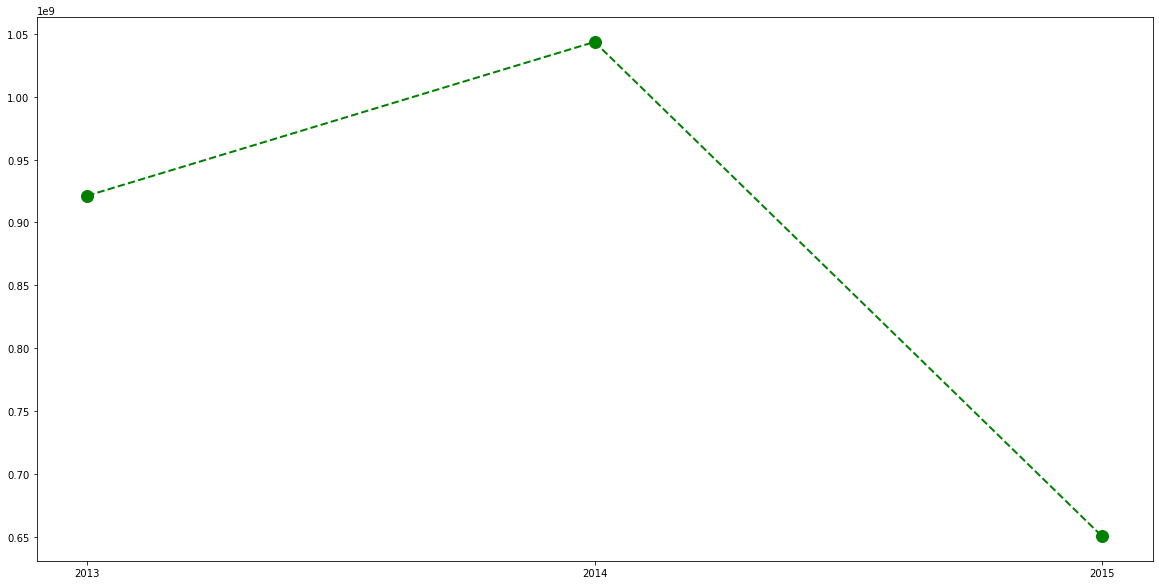

In [121]:
yearly_sales = sales_train_df.groupby('year').item_price.sum()

year = sales_train_df.year.unique()
plt.figure(figsize=(20, 10))
plt.plot(year, yearly_sales, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.show()

In [122]:
sales_train_df.item_id.nunique()

21807

In [123]:
from sklearn import preprocessing, compose, pipeline
from sklearn import linear_model # LogisticRegression

from sklearn import set_config

set_config(display='diagram')
df = sales_train_df.sample(10000)
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year
2644236,04.05.2015,28,53,3554,1999.0,1.0,052015,2015
1809567,27.07.2014,18,54,16670,148.5,1.0,072014,2014
2313874,15.12.2014,23,21,6057,299.0,1.0,122014,2014
1495869,09.03.2014,14,22,4715,299.0,1.0,032014,2014
2689576,24.06.2015,29,19,21968,949.0,1.0,062015,2015
...,...,...,...,...,...,...,...,...
1868886,15.08.2014,19,42,19822,248.0,1.0,082014,2014
1813355,30.07.2014,18,56,16790,2199.0,11.0,072014,2014
1726104,07.06.2014,17,28,16189,249.0,1.0,062014,2014
32467,04.01.2013,0,2,2929,199.0,1.0,012013,2013


In [124]:
# total sales
sales_train_df.item_price.sum()

2615410572.3632274

In [125]:
# shop count 
len(sales_train_df.shop_id.unique())

60

In [130]:
sales_train_df.groupby
oct2015 = sales_train_df[sales_train_df.month == '102015']
oct2015

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year
2882335,23.10.2015,33,45,13315,649.0,1.0,102015,2015
2882336,05.10.2015,33,45,13880,229.0,1.0,102015,2015
2882337,02.10.2015,33,45,13881,659.0,1.0,102015,2015
2882338,12.10.2015,33,45,13881,659.0,1.0,102015,2015
2882339,04.10.2015,33,45,13923,169.0,1.0,102015,2015
...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.0,1.0,102015,2015
2935845,09.10.2015,33,25,7460,299.0,1.0,102015,2015
2935846,14.10.2015,33,25,7459,349.0,1.0,102015,2015
2935847,22.10.2015,33,25,7440,299.0,1.0,102015,2015


In [131]:
oct2015.item_id.nunique()

5413

In [132]:
oct2015.groupby(["shop_id", "item_id"])[["item_cnt_day"]].agg(["min", "max", "mean", "count", "sum"])

item_cnt_day                     
                         min  max mean count  sum
shop_id item_id                                  
2       31               1.0  1.0  1.0     1  1.0
        486              1.0  1.0  1.0     3  3.0
        787              1.0  1.0  1.0     1  1.0
        794              1.0  1.0  1.0     1  1.0
        968              1.0  1.0  1.0     1  1.0
...                      ...  ...  ...   ...  ...
59      22087            1.0  3.0  2.0     3  6.0
        22088            1.0  1.0  1.0     2  2.0
        22091            1.0  1.0  1.0     1  1.0
        22100            1.0  1.0  1.0     1  1.0
        22102            1.0  1.0  1.0     1  1.0

[31531 rows x 5 columns]

In [133]:
oct2015_agg = oct2015.groupby(["shop_id", "item_id"])["item_cnt_day"].sum().reset_index()
oct2015_agg

,shop_id,item_id,item_cnt_day
0,2,31,1.0
1,2,486,3.0
2,2,787,1.0
3,2,794,1.0
4,2,968,1.0
...,...,...,...
31526,59,22087,6.0
31527,59,22088,2.0
31528,59,22091,1.0
31529,59,22100,1.0
